In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load dataset
file_path = "ToyotaCorolla - MLR.csv"
df = pd.read_csv(file_path)

In [3]:
print("===== FIRST 5 ROWS =====")
print(df.head())

print("\n===== DATA TYPES =====")
print(df.dtypes)

print("\n===== MISSING VALUES =====")
print(df.isnull().sum())

print("\n===== SUMMARY STATISTICS =====")
print(df.describe())

===== FIRST 5 ROWS =====
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  

===== DATA TYPES =====
Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

===== MISSING VALUES =====
Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc        

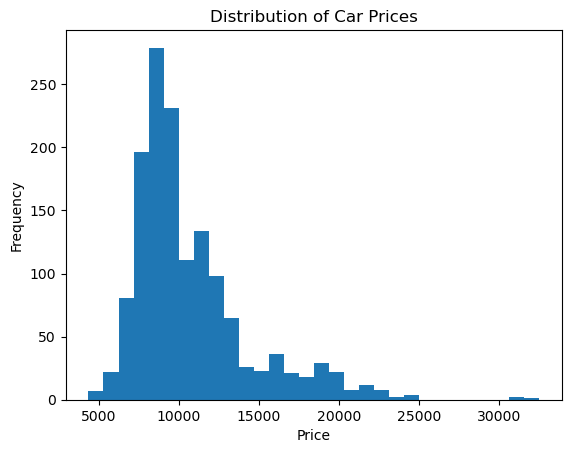

In [4]:
#  Exploratory data analysis
# Price Distribution
plt.figure()
plt.hist(df['Price'], bins=30)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

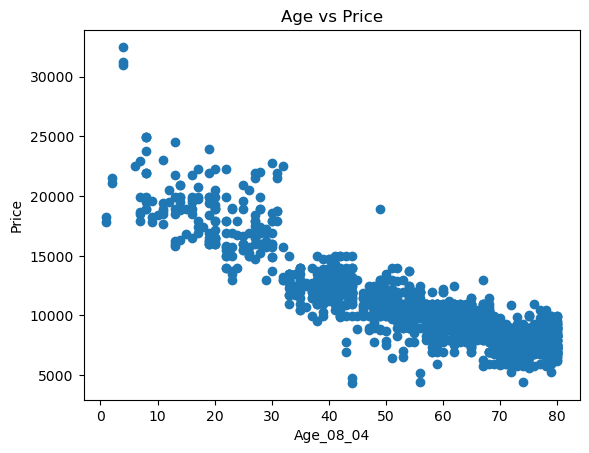

In [5]:
# Age_08_04 vs Price
plt.figure()
plt.scatter(df['Age_08_04'], df['Price'])
plt.title("Age vs Price")
plt.xlabel("Age_08_04")
plt.ylabel("Price")
plt.show()

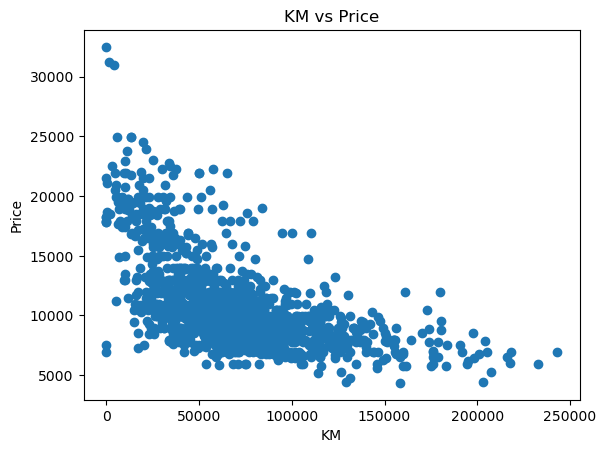

In [6]:
# Km vs Price
plt.figure()
plt.scatter(df['KM'], df['Price'])
plt.title("KM vs Price")
plt.xlabel("KM")
plt.ylabel("Price")
plt.show()

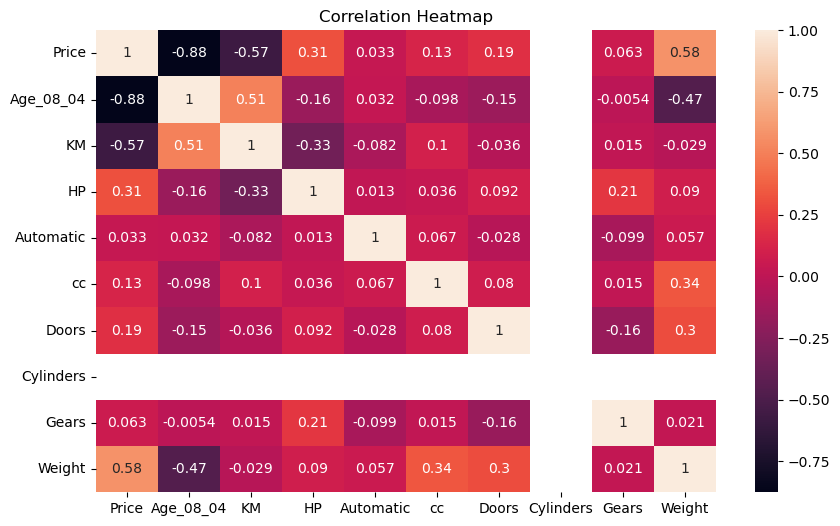

In [7]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

##### EDA Summary:
- Price distribution shows most cars fall in mid-price range.
- Scatter plots show Price decreases as Age_08_04 and KM increase.
- HP and Weight show positive correlation with Price.
- Correlation heatmap helped identify strong predictors for modeling.

In [8]:
# Data Preprocessing
# Encode categorical FuelType
le = LabelEncoder()
df['FuelType'] = le.fit_transform(df['Fuel_Type'])

In [9]:
# Define features and target
X = df.drop('Price', axis=1)
y = df['Price']

# This creates binary columns for categorical variable
X = pd.get_dummies(X, drop_first=True) 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
print("\nData Preprocessing Completed:")
print("- FuelType encoded using one-hot encoding")
print("- Features standardized")


Data Preprocessing Completed:
- FuelType encoded using one-hot encoding
- Features standardized


In [11]:
# Train data, test, split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nTrain-Test Split Done: 80% Training, 20% Testing")


Train-Test Split Done: 80% Training, 20% Testing


In [12]:
# Model 1- Full Feature Linear Regression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Model 2- Selected Strong Predictors
top_features = ['Age_08_04','KM','HP','Weight']
X2 = df[top_features]
X2_scaled = scaler.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2_scaled, y, test_size=0.2, random_state=42
)
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# Model 3- Reduced Feature Model
X3 = df[['Age_08_04','KM','HP','Weight','Automatic']]
X3_scaled = scaler.fit_transform(X3)
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3_scaled, y, test_size=0.2, random_state=42
)
lr3 = LinearRegression()
lr3.fit(X3_train, y3_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Model Evaluation

def evaluate(model, X_t, y_t, name):
    y_pred = model.predict(X_t)
    rmse = np.sqrt(mean_squared_error(y_t, y_pred))
    r2 = r2_score(y_t, y_pred)
    print(f"\n{name} Performance:")
    print("RMSE:", round(rmse,2))
    print("R2 Score:", round(r2,3))

evaluate(lr1, X_test, y_test,   "Model 1- Full Linear Regression")
evaluate(lr2, X2_test, y2_test, "Model 2- Selected Features")
evaluate(lr3, X3_test, y3_test, "Model 3 Reduced Features")


Model 1- Full Linear Regression Performance:
RMSE: 1484.27
R2 Score: 0.835

Model 2- Selected Features Performance:
RMSE: 1411.85
R2 Score: 0.851

Model 3 Reduced Features Performance:
RMSE: 1409.1
R2 Score: 0.851


In [20]:
# Coefficiant Inerpretation
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr1.coef_
})

In [17]:
print("\n===== MODEL 1 COEFFICIENTS =====")
print(coeff_df)


===== MODEL 1 COEFFICIENTS =====
             Feature   Coefficient
0          Age_08_04 -2.246662e+03
1                 KM -6.085706e+02
2                 HP  2.102533e+02
3          Automatic  3.413608e+01
4                 cc -1.288507e+01
5              Doors -5.743684e+01
6          Cylinders  1.989520e-13
7              Gears  1.039463e+02
8             Weight  1.362139e+03
9           FuelType  1.599348e+02
10  Fuel_Type_Diesel -1.548802e+02
11  Fuel_Type_Petrol  1.654853e+02


In [18]:
# RIDGE REGRESSION
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate(ridge, X_test, y_test, "Ridge Regression")


Ridge Regression Performance:
RMSE: 1483.45
R2 Score: 0.835


In [19]:
# LASSO REGRESSION
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate(lasso, X_test, y_test, "Lasso Regression")


Lasso Regression Performance:
RMSE: 1484.17
R2 Score: 0.835


### Interview Questions

##### 1) What is Normalization and Standardization, and why are they useful?

-Normalization and standardization are data scaling techniques used to bring numerical features to a similar scale.

-Normalization rescales values between 0 and 1, which is useful for distance-based algorithms like KNN or neural networks.

-Standardization transforms data so it has a mean of 0 and a standard deviation of 1, which works well for models like linear regression and SVM.

Overall, scaling helps prevent features with large values from dominating the model and improves training performance.


##### 2)How do you handle multicollinearity in multiple linear regression?

-Multicollinearity happens when independent variables are highly correlated, which can make regression coefficients unstable.

##### To handle it
I check correlation or VIF scores and remove highly correlated features if needed.
I can also use Ridge regression to reduce coefficient impact, Lasso regression to perform feature selection, or apply PCA to combine correlated features.

These techniques help make the model more stable and reliable.